In [9]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

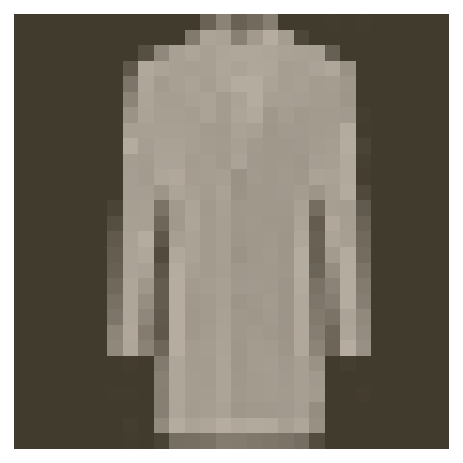

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [11]:
#training the network
from torch import nn, optim
import torch.nn.functional as F

In [12]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim=1)
        return x

In [13]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.03)

In [15]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 0.8090328123333104
Training loss: 0.6726942077310863
Training loss: 1.0950952037882957
Training loss: 1.1384309129928476
Training loss: 1.2174286501748222


In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

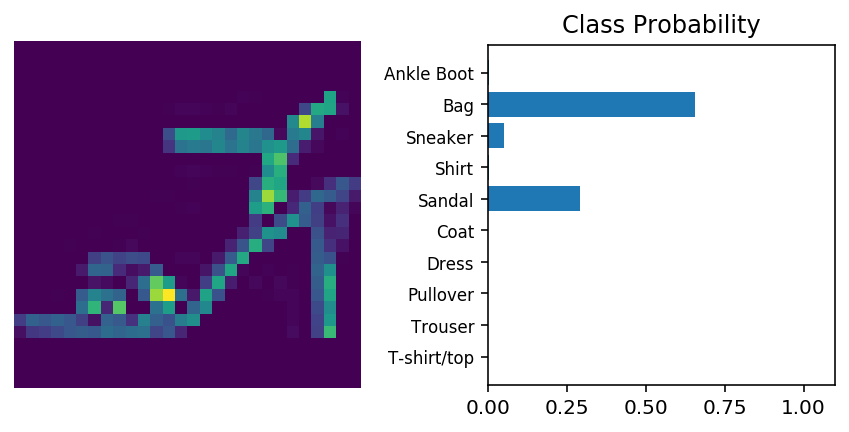

In [18]:
ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')